In [203]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torchvision
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [204]:
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50").to(device = device)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [205]:
mod0 = torch.nn.Linear(1,224*224*3, device=device)

In [206]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = optimizer = torch.optim.Adam(mod0.parameters(), lr=0.01, amsgrad=True)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

In [207]:
#Freeze model
for param in model.parameters():
    param.require_grad = False

model = model.train(False)

In [208]:
dummy_input = torch.tensor(data=[1.0], device = device)
dummy_input

tensor([1.])

In [209]:
#Model loop
epsilon = 1e-6
for i in range(10000):
    out1 = mod0(dummy_input).reshape((1,3,224,224))
    y_pred = model(out1)
    y_pred = y_pred.logits
    loss = loss_fn(y_pred, torch.tensor([282]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()
    if i % 10 == 9:
        print(i)
        print(float(loss))
    if(float(loss) < epsilon):
        break

    

KeyboardInterrupt: 

In [40]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


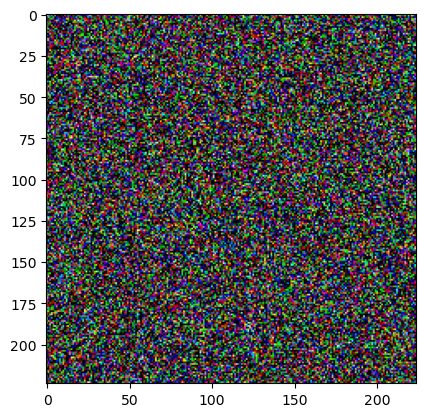

In [156]:
plt.imshow(mod0.weight.detach().reshape((3,224,224)).permute(1,2,0))

In [157]:
samp_image = mod0.weight.detach().reshape((3,224,224))

In [158]:
logits = model(samp_image.reshape((1,3,224,224))).logits
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

wool, woolen, woollen


ImageClassifierOutputWithNoAttention(loss=None, logits=tensor([[ -7.5191,  -8.3252,  -7.9990,  -7.4932,  -5.8516,  -7.6470,  -6.4269,
          -6.6744,  -6.1283,  -7.0089,  -9.2142,  -6.6270,  -7.7648,  -8.9862,
          -7.4677,  -6.6609,  -7.9997,  -8.0213,  -5.1516,  -8.0124,  -8.9033,
          -6.8605,  -7.6771,  -5.7517,  -7.4627,  -7.9766,  -7.7248,  -7.4180,
          -8.2572,  -7.7548,  -8.1630,  -8.3229,  -8.7108,  -5.6473,  -5.5631,
          -7.5610,  -6.4368,  -7.3853,  -6.8931,  -5.7124,  -7.0559,  -6.7354,
          -6.7050,  -7.7358,  -7.0336,  -6.2195,  -7.0957,  -7.9543,  -6.8560,
          -7.0979,  -6.5689,  -9.0236,  -7.1743,  -8.1670,  -6.6567,  -7.9401,
          -7.7880,  -7.0991,  -6.0325,  -7.0283,  -7.0183,  -6.2771,  -6.1879,
          -7.7832,  -6.4225,  -4.9555,  -6.6147,  -5.8992,  -5.2092,  -6.9250,
          -7.2095,  -6.4958,  -7.5175,  -7.5219,  -8.2098,  -8.0614,  -7.2864,
          -7.7846,  -5.3988,  -6.1256,  -6.8559,  -8.2919,  -5.9890,  -6.261